In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## What is the shape of "movies.csv"?

In [2]:
movies=pd.read_csv(r"C:/Users/ASUS/Downloads/movies.csv")

In [4]:
movies.shape

(9742, 3)

## What is the shape of "ratings.csv"?

In [5]:
ratings=pd.read_csv(r"C:\Users\ASUS\Downloads\ratings.csv")

In [6]:
ratings.shape

(100836, 4)

## How many unique "userId" are available in "ratings.csv"?

In [8]:
ratings['userId'].nunique()

610

In [10]:
merged = pd.merge(movies, ratings, on='movieId', how='inner')

In [11]:
merged

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


## Which movie has recieved maximum number of user ratings?

In [45]:
merged.groupby('title')['userId'].count().sort_values(ascending=False).reset_index().iloc[0]

title     Forrest Gump (1994)
userId                    329
Name: 0, dtype: object

## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [24]:
term=list(merged.loc[merged['title']=='Terminator 2: Judgment Day (1991)','rating'])

In [27]:
len(term)

224

In [28]:
summ=0
for i in term:
    summ+=i
print(summ)    

889.5


In [184]:
summ/float(len(term))

3.970982142857143

## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [29]:
tags=pd.read_csv(r"C:\Users\ASUS\Downloads\tags.csv")

In [30]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [36]:
merge1=pd.merge(merged,tags,on='movieId',how='inner')

In [37]:
merge1

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [41]:
merge1.loc[merge1['title']=='Matrix, The (1999)','tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [46]:
merged

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

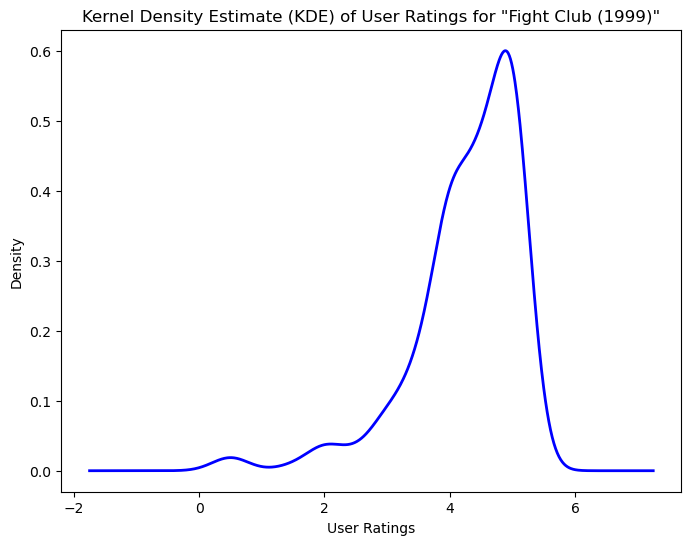

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'user_rating':list(merged.loc[merged['title']=='Fight Club (1999)','rating'])}
ratings_df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
ratings_df['user_rating'].plot(kind='kde', color='blue', linewidth=2)

# Add labels and title
plt.title('Kernel Density Estimate (KDE) of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Density')

plt.show()


## Which movie is the most popular based on  average user ratings?

In [53]:
merged.groupby('title')['rating'].count().sort_values(ascending=False).reset_index()

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

## Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

## Which movie is the most popular based on  average user ratings?

In [63]:
df2=merged.groupby('movieId')['rating'].agg(['count','mean'])

In [64]:
df2

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [60]:
df2

,count,mean
rating,,
0.5,1370,28267.988321
1.0,2811,14819.926361
1.5,1791,30537.082077
2.0,7551,15496.788108
2.5,5550,25686.934595
3.0,20047,14853.203173
3.5,13136,26388.434074
4.0,26818,17858.161496
4.5,8551,27504.881067


In [167]:
merge2=pd.merge(movies,df2,on='movieId',how='inner')

In [168]:
merge2

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [169]:
merge3=merge2[merge2['count']>50]

In [170]:
merge3.groupby('title')['mean'].max().sort_values(ascending=False).iloc[0:5]

title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
Name: mean, dtype: float64

## which comes under top 5 popular movies based on number of user ratings.

In [172]:
merge3.sort_values(by='count',ascending=False)

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [173]:
merge3

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [175]:
merge3['sci']=merge3['genres'].apply(lambda x:"".join(re.findall(r'Sci-Fi',x)))

In [176]:
merge3

,movieId,title,genres,count,mean,sci
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078,
6,7,Sabrina (1995),Comedy|Romance,54,3.185185,
...,...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi


In [94]:
tags[merge1['tag']=='Sci-Fi']

,userId,movieId,tag,timestamp
777,424,1240,Sci-Fi,1457901302


In [177]:
merge4=merge3[merge3['sci']=='Sci-Fi']

In [178]:
merge4

,movieId,title,genres,count,mean,sci
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,Sci-Fi
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,Sci-Fi
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,Sci-Fi
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,Sci-Fi
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,Sci-Fi
...,...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,Sci-Fi
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,Sci-Fi
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi


In [180]:
merge4.sort_values(by='count',ascending=False)

,movieId,title,genres,count,mean,sci
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,Sci-Fi
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,Sci-Fi
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000,Sci-Fi
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982,Sci-Fi
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,Sci-Fi
...,...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333,Sci-Fi
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,Sci-Fi
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547,Sci-Fi
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547,Sci-Fi


## Webscraping

You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [109]:
# load the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
#import time

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

In [110]:
url='https://www.imdb.com/chart/top/?ref_=nv_mv_250'

In [111]:
page=requests.get(url)

In [116]:
page.status_code

403

In [158]:
import requests
import numpy as np
from bs4 import BeautifulSoup 

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan


In [159]:
response.status_code

200

In [160]:
response.text

'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1704532603262);\n        }\n    })</script><title>IMDb: Ratings, Reviews, and Where to Watch the Best Movies &amp; TV Shows</title><meta name="description" content="IMDb is the world&#x27;s most popular and authoritative source for movie, TV and celebrity content. Find ratings and 

In [161]:
pagecontent=response.text

In [162]:
s = BeautifulSoup(pagecontent)

In [152]:
links=pd.read_csv(r"C:\Users\ASUS\Downloads\links.csv")

In [153]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [154]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [163]:
l1=[]
for i in range(1,20):
    a=scrapper(links['imdbId'][i])
    l1.append(a)
print(l1)    

['7.1', '6.6', '6.0', '6.1', '8.3', '6.3', '5.5', '5.8', '7.2', '6.8', '5.8', '7.1', '7.1', '5.7', '8.2', '7.7', '6.7', '6.4', '5.7']


In [181]:
merged_new=pd.merge(merge3,links,on='movieId')

In [182]:
merged_new

,movieId,title,genres,count,mean,sci,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,,114319,11860.0
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi,2015381,118340.0


In [183]:
l2=[]
for i in range(len(merged_new)):
    a=scrapper(merged_new['imdbId'][i])
    l2.append(a)

In [185]:
len(l2)

436

In [186]:
merged_new['new_rating']=l2

In [187]:
merged_new

,movieId,title,genres,count,mean,sci,imdbId,tmdbId,new_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi,2015381,118340.0,8.0


## Mention the movieId of the movie which has the highest IMDB rating.

In [189]:
merged_new.sort_values(by='new_rating',ascending=False)

,movieId,title,genres,count,mean,sci,imdbId,tmdbId,new_rating
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,,111161,278.0,9.3
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,,68646,238.0,9.2
146,1203,12 Angry Men (1957),Drama,57,4.149123,,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185,4.118919,,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,,71562,240.0,9.0
...,...,...,...,...,...,...,...,...,...
70,420,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller,59,2.720339,,109254,306.0,5.5
28,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,137,2.916058,,112462,414.0,5.4
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,Sci-Fi,106598,9612.0,5.4
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,Sci-Fi,112715,10329.0,5.3


## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [190]:
merged_new['genres']=merged_new['genres'].str.split("|")

In [192]:
merged_new[merged_new['genres'].apply(lambda x: 'Sci-Fi' in x)].sort_values(by=['new_rating'],ascending=False)

,movieId,title,genres,count,mean,sci,imdbId,tmdbId,new_rating
424,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill...",143,4.066434,Sci-Fi,1375666,27205.0,8.8
248,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",278,4.192446,Sci-Fi,133093,603.0,8.7
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,Sci-Fi,816692,157336.0,8.7
140,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",211,4.215640,Sci-Fi,80684,1891.0,8.7
44,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",251,4.231076,Sci-Fi,76759,11.0,8.6
...,...,...,...,...,...,...,...,...,...
36,173,Judge Dredd (1995),"[Action, Crime, Sci-Fi]",62,2.669355,Sci-Fi,113492,9482.0,5.6
35,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245,Sci-Fi,113481,9886.0,5.6
73,435,Coneheads (1993),"[Comedy, Sci-Fi]",63,2.420635,Sci-Fi,106598,9612.0,5.4
30,160,Congo (1995),"[Action, Adventure, Mystery, Sci-Fi]",57,2.877193,Sci-Fi,112715,10329.0,5.3
